In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
# Layers for our neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# A pretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

# Our normal python data science stack you've come to know and love


import sys

import warnings
warnings.filterwarnings("ignore")



# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [56]:
df_o2sat = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df_heart = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [57]:
print('Shape of o2 Saturation dataset ' + str(df_o2sat.shape))
print('Shape of heart attack dataset ' + str(df_heart.shape))
df_heart


Shape of o2 Saturation dataset (3585, 1)
Shape of heart attack dataset (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Text(0.5, 1.0, 'Heart attack frequency')

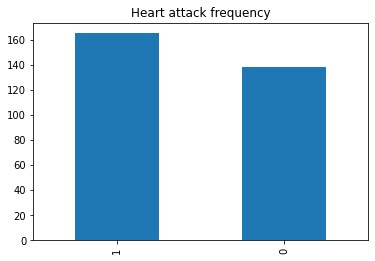

In [58]:
df_heart.output.value_counts().plot(kind ='bar')
plt.title('Heart attack frequency')

***Assuming 1 is a heart attack and 0 is no heart attack, 165 heart attacks in the dataset****

In [59]:
df_heart.isna().sum()
#no missing values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Text(0.5, 1.0, 'Correlation Plot ')

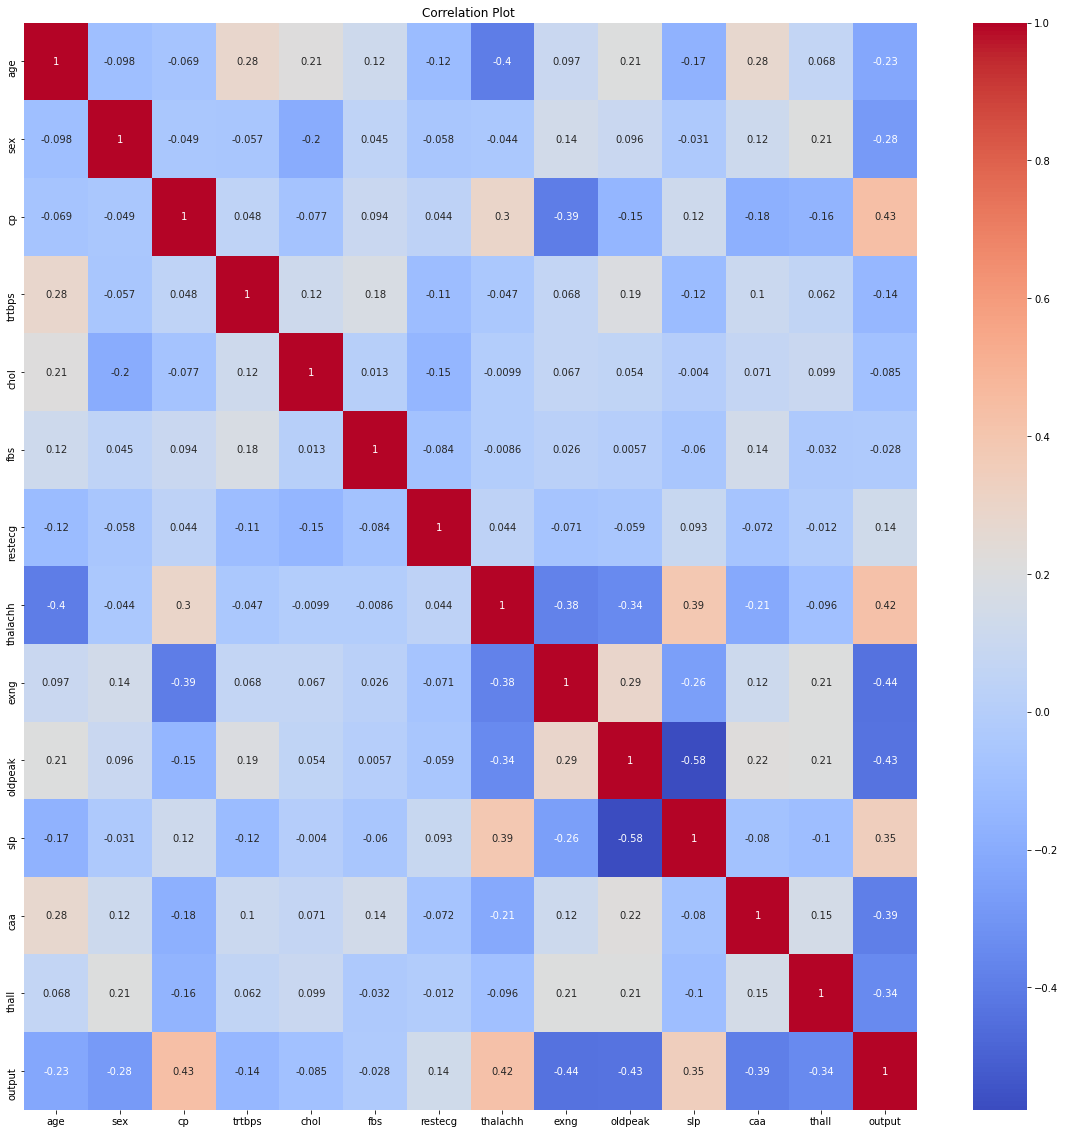

In [60]:
fig, ax = plt.subplots(figsize=(20,20))     
sns.heatmap(df_heart.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Plot ')

In [61]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng','slp', 'caa','thall'] # 8
continous_cols = ['age', 'trtbps', 'chol','thalachh', 'oldpeak'] # 5
label_col = ['output']
#X = df['']

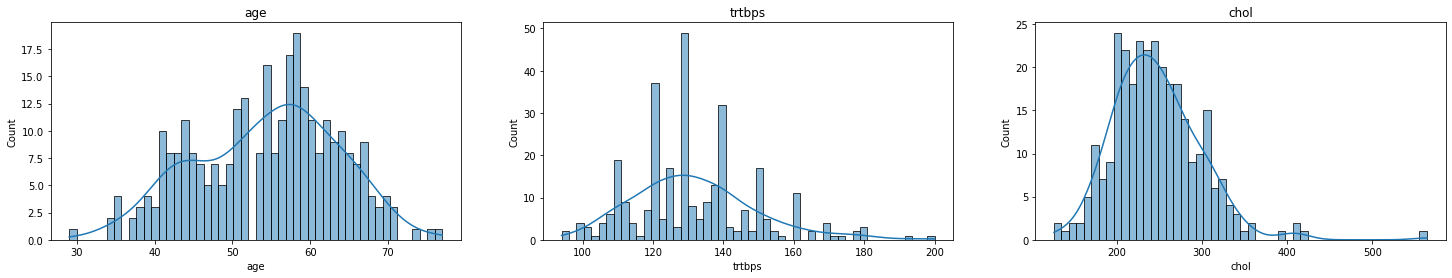

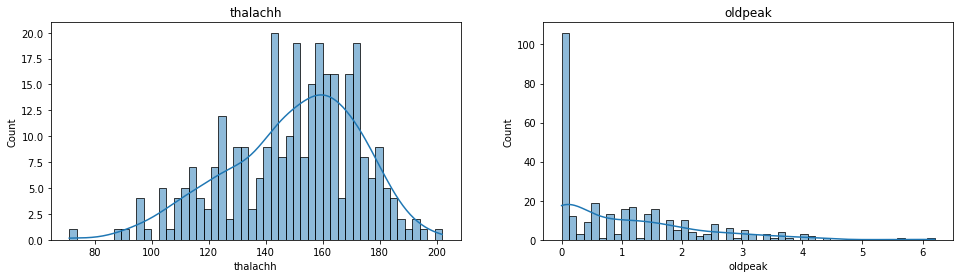

In [62]:
cnt = 0
max_in_row = 3
for x in continous_cols:
    data = df_heart[x]
    plt.figure(cnt//max_in_row, figsize=(25,4))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x)
    sns.histplot(data, bins = 50, kde=50);
    cnt += 1

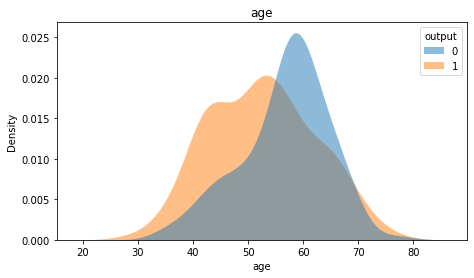

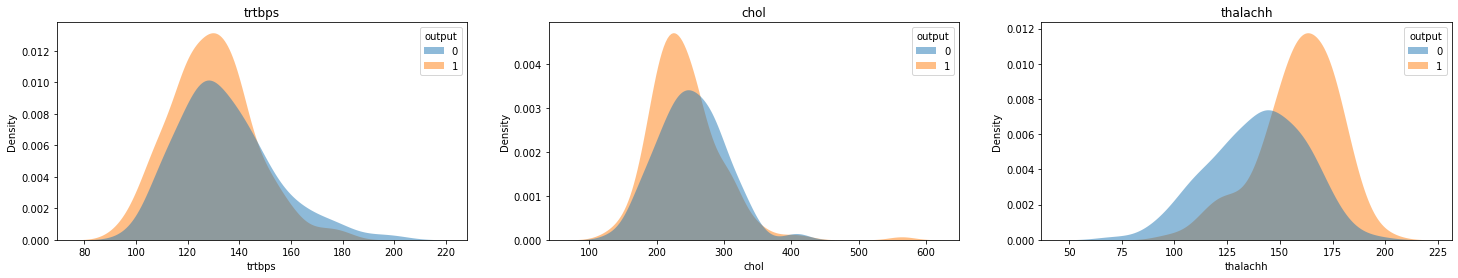

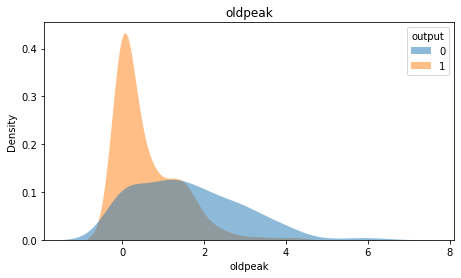

In [63]:
max_in_row = 3
for x in continous_cols:
    plt.figure(cnt//max_in_row, figsize=(25,4))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x)
    sns.kdeplot(data=df_heart, x=x, hue="output", fill=True, common_norm=1, alpha=.5, linewidth=0);
    cnt += 1

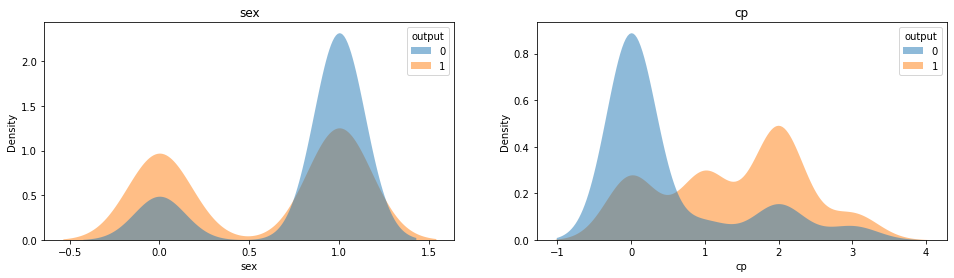

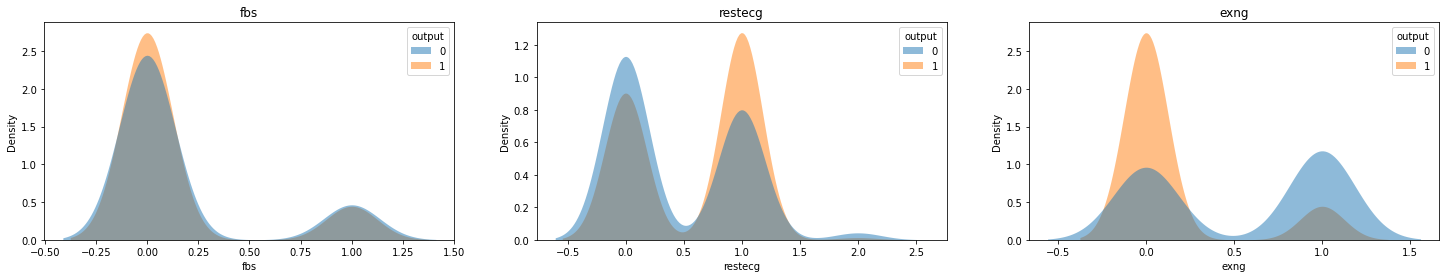

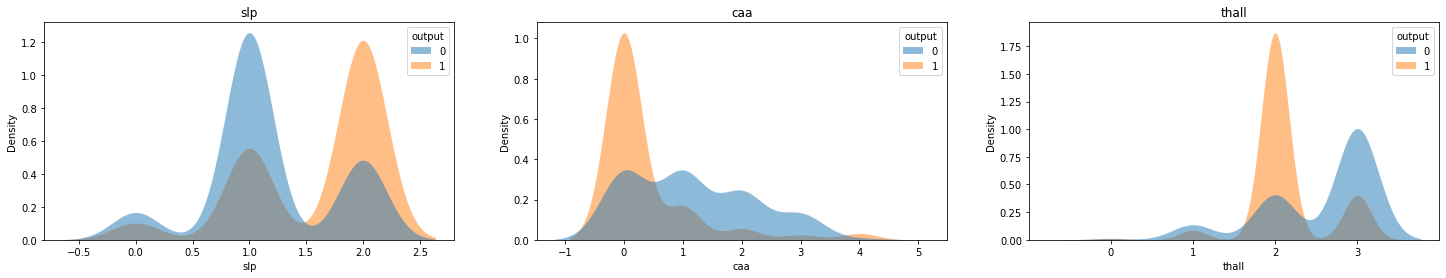

In [64]:
max_in_row = 3
for x in categorical_cols:
    plt.figure(cnt//max_in_row, figsize=(25,4))
    plt.subplot(1, max_in_row, (cnt)%max_in_row + 1)
    plt.title(x)
    sns.kdeplot(data=df_heart, x=x, hue="output", fill=True, common_norm=False, alpha=.5, linewidth=0,);
    cnt += 1

# Start of machine learning models

In [65]:
df_heart = pd.get_dummies(df_heart, columns = categorical_cols, drop_first = True)

X = df_heart.drop(['output'],axis=1) 

y = df_heart['output']
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Logistic Regression Model

In [66]:
model = LogisticRegression(max_iter=550)
# Train our model using our training data.

model.fit(X_train, y_train)
#model.predict(X_test,y_test)

LogisticRegression(max_iter=550)

In [67]:
y_pred = model.predict(X_test)

In [68]:


# Calculate our accuracy
accuracy  = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.885246
Precision Score: 0.931034
Recall Score: 0.843750
F1 Score 0.885246


# Logistic Regression model gives accuracy of 90%

# Neural Network Model

In [69]:
model = tf.keras.models.Sequential([                
  tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
epochs = 100
model.fit(X_train, y_train, epochs=epochs, validation_split=0.1,verbose=0)
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.4649 - acc: 0.8689


[0.4649113714694977, 0.868852436542511]

## Neural Network accuracy: 87%

In [70]:
#model = DecisionTreeClassifier(max_depth=)
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 4, 8, 16,32,64,128], 
    'min_samples_split': [2, 4, 8, 16,32,64,128],
    'min_samples_leaf': [2, 4, 8, 16,32,64,128],
         }
grid_search_cv =  GridSearchCV( 
    estimator = DecisionTreeClassifier(), 
    param_grid = params, 
    scoring = 'accuracy')
grid_search_cv.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128],
                         'min_samples_leaf': [2, 4, 8, 16, 32, 64, 128],
                         'min_samples_split': [2, 4, 8, 16, 32, 64, 128]},
             scoring='accuracy')

In [71]:
model = DecisionTreeClassifier(grid_search_cv.best_estimator_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass criterion=DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=2) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [72]:
y_pred = grid_search_cv.predict(X_test)

In [73]:
#y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.737705


## Decision Tree Classifier not so good

# Random Forrest 82% accuracy

In [74]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(accuracy_score(pred,y_test))

0.819672131147541


# K Neighbors classifier 89% accuracy

In [75]:
model =  KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8852459016393442


# Support Vector Machine Classifier 85%

In [95]:
params = {
            'max_iter' : [5,7,9,10,12,-1],
            'degree' : [2,3,4,5,6],
            'kernel' : [ 'poly','sigmoid','rbf','linear'],
            'gamma' : ['scale','auto'],
        
         }
grid_search_cv =  GridSearchCV( 
    estimator = SVC(), 
    param_grid = params, 
    scoring = 'accuracy')
grid_search_cv.fit(X_train, y_train)
y_pred = grid_search_cv.predict(X_test)
print(grid_search_cv.best_estimator_)
accuracy_score(y_pred=y_pred,y_true=y_test)

SVC(degree=2, kernel='linear')


0.8524590163934426

0.8032786885245902

In [ ]:
model = SVC(max_iter=10,degree=3,kernel='poly')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))